In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [84]:
data= pd.read_csv("/content/Car_data.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [85]:
data.shape

(4340, 8)

In [86]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [88]:
data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [89]:
#checking the distribution of categorical data
print(data.fuel.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [90]:
print(data.seller_type.value_counts())

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [91]:
print(data.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [92]:
data.replace({'fuel': {'Petrol': 0,'Diesel': 1,'CNG': 2,'LPG': 3,'Electric': 4}}, inplace=True)
data.replace({'seller_type': {'Individual': 0,'Dealer': 1,'Trustmark Dealer': 2}}, inplace=True)
data.replace({'transmission': {'Manual': 0,'Automatic': 1}}, inplace=True)

<ipython-input-92-22b98499454a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'fuel': {'Petrol': 0,'Diesel': 1,'CNG': 2,'LPG': 3,'Electric': 4}}, inplace=True)
<ipython-input-92-22b98499454a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'seller_type': {'Individual': 0,'Dealer': 1,'Trustmark Dealer': 2}}, inplace=True)
<ipython-input-92-22b98499454a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly cal

In [93]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,Second Owner


In [94]:
print(data.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [95]:
data.replace({'owner': {'First Owner': 0,'Second Owner': 1,'Third Owner': 2,'Fourth & Above Owner': 3,'Test Drive Car': 4}}, inplace=True)

<ipython-input-95-82682a418ccc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'owner': {'First Owner': 0,'Second Owner': 1,'Third Owner': 2,'Fourth & Above Owner': 3,'Test Drive Car': 4}}, inplace=True)


In [96]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [97]:
x=data.drop(['name','selling_price'],axis=1)
y= data['selling_price']

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3,random_state= 42)

In [99]:
model= LinearRegression()

In [100]:
model.fit(x_train,y_train)

LinearRegression()

In [101]:
training_data_prediction = model.predict(x_train)

In [102]:
error_score= metrics.r2_score(y_train,training_data_prediction)
print("The error rate is :",error_score)

The error rate is : 0.4432696214168351


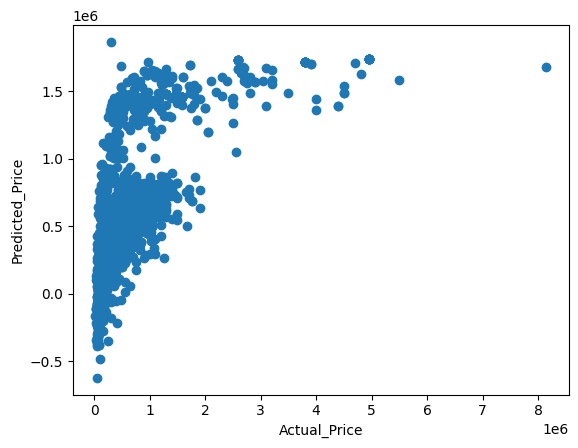

In [103]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.show()

In [104]:
testing_data_prediction = model.predict(x_test)

In [105]:
error_score_2= metrics.r2_score(y_test,testing_data_prediction)
print("The error rate is :",error_score_2)

The error rate is : 0.43232134000501066


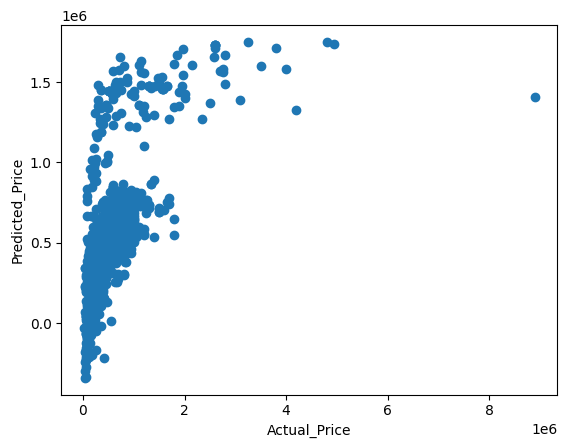

In [107]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.show()